In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Dataset

In [5]:
df = pd.read_csv("C:/Users/Asus/OneDrive/Desktop/forestfires.csv")

In [6]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
month - month of the year: "jan" to "dec"
day - day of the week: "mon" to "sun"
FFMC - FFMC index from the FWI system: 18.7 to 96.20
DMC - DMC index from the FWI system: 1.1 to 291.3
DC - DC index from the FWI system: 7.9 to 860.6
ISI - ISI index from the FWI system: 0.0 to 56.10
temp - temperature in Celsius degrees: 2.2 to 33.30
RH - relative humidity in %: 15.0 to 100
wind - wind speed in km/h: 0.40 to 9.40
rain - outside rain in mm/m2 : 0.0 to 6.4
area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).


FFMC, DMC, DC, ISI: Fire weather indices measuring conditions for forest fires:
FFMC (Fine Fuel Moisture Code): Dryness of surface fuels.
DMC (Duff Moisture Code): Moisture in loosely compacted organic layers.
DC (Drought Code): Long-term dryness measure.
ISI (Initial Spread Index): Fire's initial spread rate.

In [11]:
df.shape  # rows and columns

(517, 13)

In [13]:
df.size # total values

6721

In [15]:
df.ndim # Dimension of array

2

In [17]:
df["DMC"].dtype #datatype

dtype('float64')

In [19]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [21]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [35]:
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


# Cleaning the Dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [26]:
df.describe(include=['O']) #Display numerical/statistical information  for object datatype

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [28]:
obj = df.describe(include=["O"]).columns   #Display the object datatype columns

In [30]:
print(list(obj))  # Print it in List form

['month', 'day']


In [32]:
df["month"].value_counts()

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

In [34]:
df["day"].value_counts()

day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64

In [36]:
df.describe(include = ["int","float"])  # Display numerical/statistical information for int and float datatype

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [38]:
obj = df.describe(include = ["int","float"]).columns # Display the int and float datatype columns

In [40]:
print(list(obj)) # Display it in list form

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [42]:
# Converting distance from hectare to kilometer

df["area_km"] = df["area"]/100
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.0644
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.5429
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.1116
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.0000


In [44]:
df.isnull().sum() # checking for missing values

X          0
Y          0
month      0
day        0
FFMC       0
DMC        0
DC         0
ISI        0
temp       0
RH         0
wind       0
rain       0
area       0
area_km    0
dtype: int64

In [46]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}
df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)

In [48]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0000
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0000
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0000
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0000
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.0644
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.5429
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.1116
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.0000


In [50]:
df.sort_values(by="area_km", ascending=False).head()  # Highest distance of fire in Km

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
238,6,5,9,6,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,10.9084
415,8,6,8,4,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,7.4628
479,7,4,7,1,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,2.7853
237,1,2,9,2,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,2.1288
236,2,2,9,6,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,2.0094


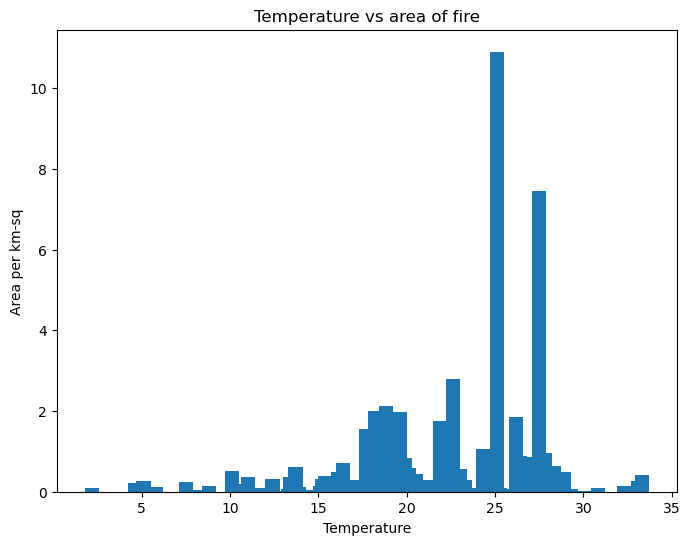

In [52]:
H_FireArea = df.sort_values(by="area_km", ascending=True)

plt.figure(figsize=(8, 6))

plt.title("Temperature vs area of fire" )
plt.bar(H_FireArea['temp'], H_FireArea['area_km'])

plt.xlabel("Temperature")
plt.ylabel("Area per km-sq")
plt.show()

Here, We can see that the highest fire around the area in kilometers and the temperature. Around 25 to 30 temperature the heightst km per area fire occurs.

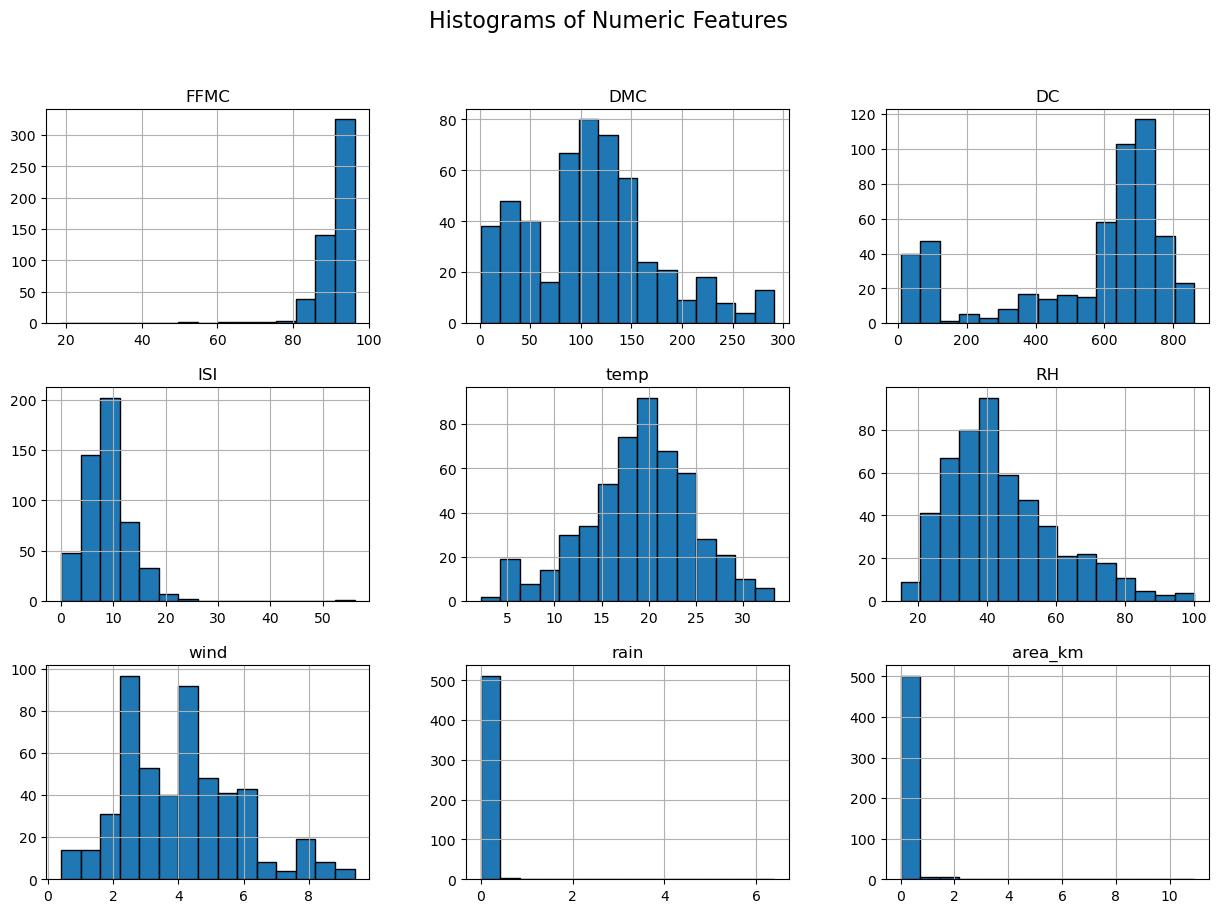

In [54]:
# Plot histograms for numeric variables
df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area_km']].hist(
    bins=15, figsize=(15, 10), edgecolor='black'
)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


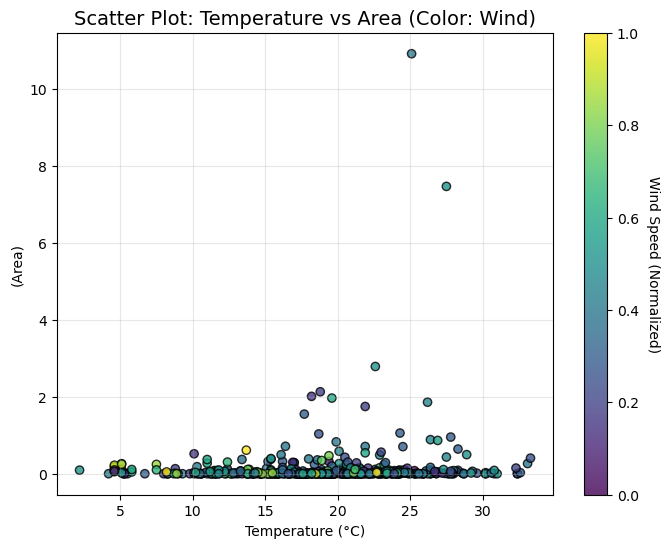

In [58]:
# Prepare the data
x = df['temp'].values 
y = df['area_km'].values  
wind = df['wind'].values  

# Normalize wind values for color mapping
wind_normalized = (wind - wind.min()) / (wind.max() - wind.min())

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=wind_normalized, cmap='viridis', alpha=0.8, edgecolor='k')

# Add a colorbar for wind speed
cbar = plt.colorbar(scatter)
cbar.set_label('Wind Speed (Normalized)', rotation=270, labelpad=15)

# Labels and title
plt.title("Scatter Plot: Temperature vs Area (Color: Wind)", fontsize=14)
plt.xlabel("Temperature (°C)")
plt.ylabel("(Area)")
plt.grid(alpha=0.3)
plt.show()


Data Selection: Extracted temp (x-axis), area_km (y-axis), and wind (color) values directly using Pandas.
Color Normalization: The wind values were normalized to fit the color map scale [0, 1].
Color Map: Used Matplotlib's viridis colormap for coloring points based on wind speed.
Customization:
Added a color bar to indicate wind speed.
Used scatter from Matplotlib for plotting.

In [ ]:
Size: 517 rows and 13 columns.

Target Variable: area (burned forest area).

Key Insights:
Strong correlations between fire weather indices and burned area.
Weather conditions like temperature and wind significantly influence the area burned.

# Machine Learning

In [ ]:
Machine Learning Workflow:

Data Preparation:

Split the dataset into features and target variable.
Perform train-test split for evaluation.
Normalize/scale numeric features.
Model Selection:

Use linear regression as a baseline model.
Evaluate its performance using Mean Squared Error (MSE) and R² metrics.
Model Training and Evaluation:

Fit the model on the training set.
Evaluate predictions on the test set.
Feature Importance:

Analyze which features most influence the model's predictions.

In [ ]:
Explanation of Workflow

Normalization: Scaled all features to the range [0, 1] using min-max scaling.
Train-Test Split: Divided data into 80% training and 20% testing.
Linear Regression: Used the Normal Equation to compute regression coefficients directly.
Evaluation Metrics: Calculated MSE and R² manually.
Visualization: Scatter plot to show the quality of predictions.

In [137]:
import numpy as np

# Define features and target
X = df[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']].values
y = df['area_km'].values

# Normalize features (min-max scaling)
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_normalized = (X - X_min) / (X_max - X_min)

# Train-test split (80-20 split)
split_index = int(0.8 * len(X_normalized))
X_train, X_test = X_normalized[:split_index], X_normalized[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [141]:
# Add intercept (bias term) to X_train
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]

# Compute coefficients using the Normal Equation
# Coefficients = (X^T * X)^-1 * X^T * y
coefficients = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

print("Coefficients (including bias):", coefficients)


Coefficients (including bias): [-0.08640601  0.08705973 -0.02655232  0.32669271  0.11130112  0.04167851
  0.31080915 -0.22761802 -0.54688797  0.11586323 -0.19064444  0.00790032
 -0.8325256 ]


In [145]:
# Add intercept to X_test
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# Predict using the linear regression model
y_pred = X_test_bias @ coefficients


In [147]:
# Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)

# R² Score
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.64
R² Score: -0.01


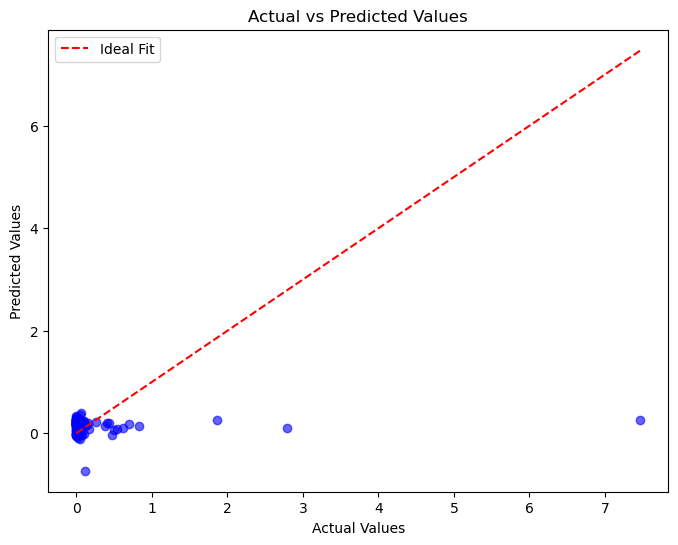

In [149]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()
